# Apresentação:

    A proposta aqui é estudar sobre o Word2vev, uma técnica utilizada
    na área de Processamento de Linguagem Natural (NLP) para obter
    representações vetoriais de palavras. Esses vetores capturam informações
    sobre o significado da palavra com base nas palavras circundantes. O
    algoritmo word2vec estima essas representações modelando o texto em um
    corpus grande. Uma vez treinado, esse modelo pode detectar palavras
    sinônimas ou sugerir palavras adicionais para uma sentença parcial.
    
    O word2vec é uma técnica introduzida por engenheiros do Google em 2013,
    popularizada por declarações como "king - man + woman = queen".

Artigo: https://arxiv.org/pdf/1301.3781.pdf

Tutorial: https://jaketae.github.io/study/word2vec/

# Preparando os dados:

    O primeiro passo para se treinar um modelo linguístico é obter os
    dados para o treinameto do modelo. Aqui, o próprio tutorial já nos
    fornece um texto para utilizarmos.

    Geralmente esse processo por sí só já é um processo trabalhoso de
    scraping e automatização de aquisição de dados, aqui acaba sendo
    um processo simplificado.

In [ ]:
# Texto:
text = '''Machine learning is the study of computer algorithms that \
improve automatically through experience. It is seen as a \
subset of artificial intelligence. Machine learning algorithms \
build a mathematical model based on sample data, known as \
training data, in order to make predictions or decisions without \
being explicitly programmed to do so. Machine learning algorithms \
are used in a wide variety of applications, such as email filtering \
and computer vision, where it is difficult or infeasible to develop \
conventional algorithms to perform the needed tasks.'''

# Tokenização:

    Tokenização, como já vimos em outros materiais, é o processo de
    códificação do nosso texto. É a etapa de transformação a da nossa
    sequência de caracteres em um vetor numético.

In [ ]:
# Biblioteca de regex:
import re

In [ ]:
def tokenize(text):
  '''
    Função utilizada para encontrar padrões na
  sequência fornecida.

  Entrada:
  - String: Nosso texto utilizado.

  Saída:
  - list: Um vetor de sequências padronizadas.
  '''
  pattern = re.compile(r'[A-Za-z]+[\w^\']*|[\w^\']*[A-Za-z]+[\w^\']*')
  return pattern.findall(text.lower())

    Geralmente quando fala-se de tokenização, já se imbute implicitamente
    ao processo a ideia de codificação da sequência em um vetor numérico.
    Aqui, a função tokenizer simplesmente encontra padrões no texto, mantendo
    a estrutura de string do texto.

In [ ]:
# Tokenizando o texto:
tokens = tokenize(text);type(tokens)

list

In [ ]:
def mapping(tokens):
  '''
    Função de mapeamento de sequencias para
  vetores numéricos.

  Entrada:
  - lista: O nosso vetor de strings.

  Saídas:
  - dict: Dicionário mapeando cada string
  para seu indice.
  - dict: Dicionário mapeando cada indice
  para sua respectiva string.
  '''
  word_to_id = {}
  id_to_word = {}
  for i, token in enumerate(set(tokens)):
      word_to_id[token] = i
      id_to_word[i] = token
  return word_to_id, id_to_word

    Aqui o tutorial utiliza o próprio indice para codificar a palavra.
    O que ele está criando é uma tabela de busca que permite converter
    facilmente de palavras para índices e de índices para palavras.
    Isso será particularmente útil mais tarde, quando realizarmos
    operações como codificação one-hot.

In [ ]:
word_to_id, id_to_word = mapping(tokens)

In [ ]:
# Olhando a resposta:
print(id_to_word) # O id_to_word é a mesma coisa, só que ao contrário em relação a keys e values.

{0: 'the', 1: 'of', 2: 'filtering', 3: 'automatically', 4: 'through', 5: 'it', 6: 'a', 7: 'used', 8: 'and', 9: 'model', 10: 'study', 11: 'sample', 12: 'tasks', 13: 'develop', 14: 'artificial', 15: 'algorithms', 16: 'perform', 17: 'is', 18: 'known', 19: 'improve', 20: 'do', 21: 'conventional', 22: 'that', 23: 'data', 24: 'based', 25: 'being', 26: 'decisions', 27: 'difficult', 28: 'are', 29: 'make', 30: 'variety', 31: 'email', 32: 'subset', 33: 'learning', 34: 'machine', 35: 'computer', 36: 'build', 37: 'to', 38: 'explicitly', 39: 'so', 40: 'applications', 41: 'experience', 42: 'predictions', 43: 'in', 44: 'where', 45: 'or', 46: 'order', 47: 'without', 48: 'infeasible', 49: 'as', 50: 'mathematical', 51: 'programmed', 52: 'on', 53: 'such', 54: 'intelligence', 55: 'seen', 56: 'vision', 57: 'needed', 58: 'wide', 59: 'training'}


    Basicamente a ideia aqui é, dado uma sequência, um texto, no caso,
    é separar esse texto por seus padrões utilizando a função tokenizer,
    no caso aqui, fazendo uma tokenização por palavras. E ai, a cada token,
    a cada palavra, associa-se um indice.

    Basicamente o que se está sendo feito nada mais é do que um banco
    de dados de sequências, onde tem-se as strings e a cada string é
    associado-se um indice.

    É uma visão, uma solução, bem de ciência da computação mesmo, talvez
    um estatístico ou matemático formaliza-se isso de forma diferente. É
    um tipo de solução, mas não me parece a solução ótima.

# Gerando Dados de Treinamento:

    O processo de treinamento aqui é um caso de aprendizado supervisionado,
    ou seja, os nossos dados de treino precisam estar labelados.Todavia, o
    processo de tokenização implementado não nos devolveu ainda o nosso vetor
    numérico. Então esse é um ponto a se resolver.

    O outro ponto é enteder o funcionamento do word2vec em si. Basicamente,
    ele é um processo bidirecional, de modo que olha tanto as palavras
    anteriores, quanto as palavras seguintes à nossa palavra, tendo um
    parâmetro específico para cuidar da quantidade de palavras que vão
    ser utilizadas.

In [ ]:
# Baixando imagem:
!curl -o img.png https://miro.medium.com/v2/resize:fit:1400/1*Mmp1vbFOxrmiCF17lYJWRA.png

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 32587  100 32587    0     0   160k      0 --:--:-- --:--:-- --:--:--  161k


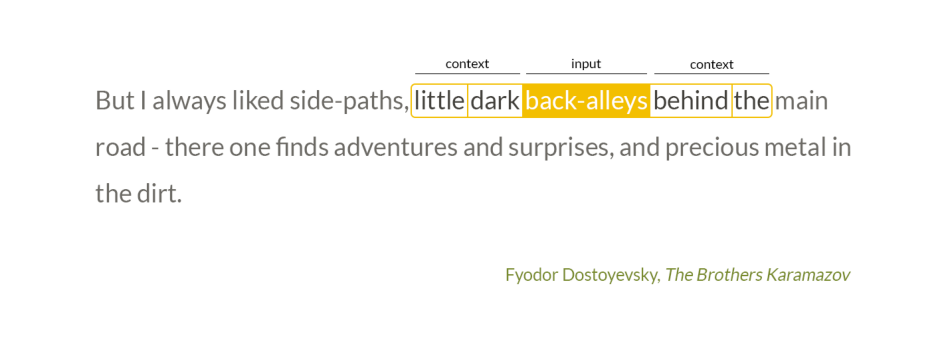

In [ ]:
# Importando Biblioteca:
import cv2
import matplotlib.pyplot as plt

# Carregar a imagem:
imagem = cv2.imread('img.png')

# Mostrar a imagem usando matplotlib
plt.figure(figsize=(12, 12))
plt.imshow(imagem)
#plt.text(0.5, 0.5, ha='center')
plt.axis('off')
plt.show()

    Imagem retirada do artigo do Medium:
Artigo(Medium): https://towardsdatascience.com/using-word2vec-for-music-recommendations-bb9649ac2484

In [ ]:
# Importando biblioteca de Algebra Linear:
import numpy as np

In [ ]:
# Fixando aleatóriedade:
np.random.seed(42)

In [ ]:
def concat(*iterables):
  '''
    Função concat recebe um número variável de iteráveis como argumentos e
  produz cada elemento de cada iterável como resultado. Isso permite concatenar
  vários iteráveis em um único iterável, o que pode ser útil em várias situações,
  como no exemplo anterior, onde é usado para criar um índice completo que representa
  o contexto em torno de uma palavra durante o treinamento do modelo Word2Vec.

  Entrada:
  - Objetos interaveis:

  Saída:
  - Objeto iterável.
  '''
  for iterable in iterables:
      yield from iterable

**yield e classe generator**

    O 'yield' é uma 'palvra-mágica' do python que permite criar uma classe
    'generator', que é um tipo de classe de iterável em python, tipo list,
    ou dict, porém é uma classe especial que permite a geração lazy de
    valores, ou seja, você vai gerando valores a medida que o processo
    vai acontecendo. Isso é muito útil quando se trabalha com grandes
    quantidades de dados, para preservar de gastos desnecessários de memória.

**yield from**

    "A sintaxe yield from permite que geradores complexos sejam refatorados
    em geradores menores e aninhados, ao mesmo tempo que evita muito código
    repetitivo anteriormente necessário para um gerador delegar a subgeradores."
    Luciano Ramalho, Python Fluente.

In [ ]:
def one_hot_encode(id, vocab_size):
  '''
    Função de one_hot_encode, basicamente ele
  cria um vetor de zeros do tamanho do vocabulário
  e para o indice fornecido, escreve-se como 1.

  Essa função será rodada para cada string do nosso
  vetor de tokens.

  Entrada:
  - int: Nosso valor de index:
  - int: tamanho do vocabulário:

  Saída:
  - list: um vetor codificado de zeros e 1s.
  '''
  # Construindo o vetor codificado:
  res = [0] * vocab_size
  res[id] = 1
  return res

In [ ]:
def generate_training_data(tokens, word_to_id, window):
  '''
    Função de treinamento do modelo.
  '''
  X = []
  y = []
  n_tokens = len(tokens)
  count1 = 0
  count2 = 0
  # Absorvendo as palavras - Colunas:
  for i in range(n_tokens): # Aqui range(0,n_tokens-1)
      # Janela bidirecional:
      idx = concat(
          range(max(0, i - window), i), # intervalo: [max(0,i−window),i)
          range(i, min(n_tokens, i + window + 1)) # Intervalo: [i,min(n_tokens,i+window)]
      )
      count1 += 1
      # Varrendo o texto no processo de codicicação - Linhas:
      for j in idx:
          if i == j:
              continue
          X.append(one_hot_encode(word_to_id[tokens[i]], len(word_to_id)))
          y.append(one_hot_encode(word_to_id[tokens[j]], len(word_to_id)))
          count2 += 1

  print(count1,count2)
  # Vetores:
  return np.asarray(X), np.asarray(y)

    Basicamente, iteramos sobre os dados tokenizados e geramos pares. Uma
    particularidade aqui é que, para os primeiros e últimos poucos tokens,
    pode não ser possível obter palavras à esquerda ou à direita desse token
    de entrada. Nesses casos, simplesmente não consideramos esses pares de
    palavras e olhamos apenas para o que é viável sem causar IndexErrors.
    Também observe que criamos X e y separadamente em vez de colocá-los na
    forma de tupla, como demonstrado acima. Isso é apenas por conveniência
    com outras operações de matriz posteriormente no post.

In [ ]:
# Checando o que é armazenado na variável idx:
idx_teste = concat(range(max(0, 1 - 2), 1), range(1, min(60, 1 + 2 + 1)))
print(idx_teste)
print(type(idx_teste))

<generator object concat at 0x7dc3933898c0>
<class 'generator'>


In [ ]:
# Gerando dados de Treinamento:
X, y = generate_training_data(tokens, word_to_id, 2)

84 330


## Investigando X e y:

    Vamos olhar um pouco melhor o que são esses X e y para entender
    melhor o que eles são. A impressão que eu tive é q são vetores
    iguais.

In [ ]:
# Checando tamanho da sequência:
print(f'Numero de caracteres: {len(text)}')
print(f'Numero de tokens: {len(tokens)}')
print(f'Numero de palavras: {len(word_to_id)}')

Numero de caracteres: 556
Numero de tokens: 84
Numero de palavras: 60


    Vemos que as colunas das matrizes são as palavras, porém as linhas

**Investigando mais profundamente**

    Caso se queria uma investigação um pouco mais profunda,
    eu construi uma função teste que dá algumas informações
    extras sobre os dados gerados dada o tamanho da janela.

In [ ]:
# Dependencias auxiliares:
import pandas as pd
import seaborn as sns

In [ ]:
def teste(ranges_janela, colunas, taxa_similaridade=False):

  for janela in ranges_janela:
    print(f'Para \033[1mjanela = {janela}\033[0m, temos:')
    # Gerando dados de Treinamento:
    X, y = generate_training_data(tokens, word_to_id, janela)

    # Checando tamanho:
    print('Tamanho das matrizes:')
    print(X.shape,y.shape,'\n')

    # Chegando similiaridade entre os vetores:
    print('Matriz de similaridade:')
    print(sum(X == y));print()

    if taxa_similaridade:
      # Checando taxa de semelhança:
      for linha in [f'taxa de similaridade[{j+1}]: {round((i/X.shape[0])*100,2)}%, ou seja, {X.shape[0]-i} diferenças.' for j,i in enumerate(sum(X == y))]:
        print(linha)

    # Construindo dataframe:
    for j in colunas:
      df = pd.DataFrame(X)
      print(df[j].value_counts())
      for k, row in enumerate(df[j]):
        if row == 1:
          print(f'Na linha {k}, temos o valor 1')

In [ ]:
teste([1,2,3,4],[1])

Para janela = 1, temos:
84 166
Tamanho das matrizes:
(166, 60) (166, 60) 

Matriz de similaridade:
[158 154 162 162 162 158 154 162 162 162 162 162 164 162 162 150 162 154
 162 162 162 162 162 158 162 162 162 162 162 162 162 162 162 154 156 158
 162 150 162 162 162 162 162 158 162 158 162 162 162 154 162 162 162 162
 162 162 162 162 162 162]

1
0    160
1      6
Name: count, dtype: int64
Na linha 9, temos o valor 1
Na linha 10, temos o valor 1
Na linha 37, temos o valor 1
Na linha 38, temos o valor 1
Na linha 119, temos o valor 1
Na linha 120, temos o valor 1
Para janela = 2, temos:
84 330
Tamanho das matrizes:
(330, 60) (330, 60) 

Matriz de similaridade:
[314 306 322 322 322 314 306 322 322 322 322 322 326 322 322 298 322 306
 322 322 322 322 322 314 322 322 322 322 322 322 322 322 322 308 310 314
 322 298 322 322 322 322 322 314 322 314 322 322 322 306 322 322 322 322
 322 322 322 324 322 322]

1
0    318
1     12
Name: count, dtype: int64
Na linha 17, temos o valor 1
Na linha 18, t

# Panorama do Modelo:

    Primeiro, os embeddings são simplesmente as linhas da primeira matriz
    de pesos, denotada como W1. Através do treinamento e da retropropagação,
    ajustamos os pesos de W1, juntamente com a matriz de pesos na segunda
    camada, denotada como W2, usando a perda de entropia cruzada. No geral,
    nosso modelo assume a seguinte estrutura:

* $A_1 = XW_1$:



```
Executa-se o primeiro produto interno entre os nossos dados
(One_hot encoding) com a primeira matriz de pesos. O resultado
disso é a matriz de embeddings.
```



* $A_2 = A_1W_2$:



```
Executa-se o produto interno entre a matriz de embeddings e o outro conjunto
de pesos, de moto que temos os nossos logits, o que é chamado de saída.
```



* $Z = softmax(A_2)$



```
Passamos então o softmax para termos o as probabilidades.
```




In [ ]:
# Rede utilizada:
def init_network(vocab_size, n_embedding):
  '''
    Função que inicializa a nossa rede neural.

  Entradas:
  - Inteiros: Tamanho do nosso vocabulário e o
  o tamanho do nosso vetor de embeddings;

  Saída:
  - Dicionário: Nosso modelo.
  '''
  model = {
      # Gerando as matrizes de peso (De forma aleatória):
      "w1": np.random.randn(vocab_size, n_embedding), # Pesos para a construção do embedding;
      "w2": np.random.randn(n_embedding, vocab_size) # Pesos para a construção dos logits.
  }
  return model

In [ ]:
# Iniciando o modelo:
model = init_network(len(word_to_id), 10)

In [ ]:
# Observando o modelo:
for key in model.keys():
  print(f'para {key}, temos {np.array(model[key]).shape}')

para w1, temos (60, 10)
para w2, temos (10, 60)


# O modelo de Embedding:

    Um dos primeiros pontos a destacar aqui é a codificação escolhida.
    A sequência foi codificada de forma dummy, ou seja, ele tokenizou
    pelas palavras, a função geradora de dados para gerar vetores de
    zeros e uns dado o contexto proximo a palavra, de modo que:

**Encontrando os embeddings**

$A_1 = XW_1$

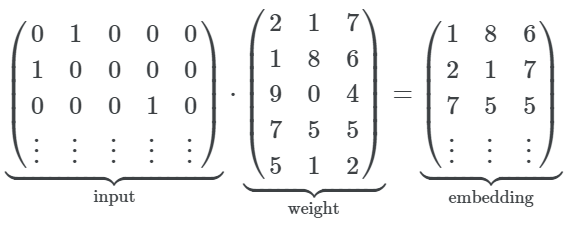


    Esse tipo de codificação não é muito comum, porque ela gera um vetor
    muito esparço, como ele mesmo comenta no texto. O interessante desse
    modo é que, usando one-hot encoding, a matriz de pesos age efetivamente
    como uma tabela de pesquisa que mapeia vetores codificados one-hot para
    vetores densos em uma dimensão diferente.

    Matemáticamente falando, o one-hot encoding funciona como uma função
    indicadora, indicando se a palavra está ou não naquela representação
    codificada.

    Como ele mesmo aponta:

$inputs_{(nx5)}* weights_{(5x3)}=outputs_{(nx3)}$

    Isso é exatamente o que queremos alcançar com o embedding: representar
    palavras como vetores densos, um avanço em relação à simples codificação
    one-hot. Esse processo é exatamente o que a embedding é: à medida que
    começamos a treinar este modelo com os dados de treinamento gerados acima,
    esperaríamos que o espaço de linhas dessa matriz de pesos codifique
    informações semânticas significativas dos dados de treinamento.

In [ ]:
def get_embedding(model, word):
    try:
        idx = word_to_id[word]
    except KeyError:
        print("`word` not in corpus")
    one_hot = one_hot_encode(idx, len(word_to_id))
    return forward(model, one_hot)["a1"]

# Feedforward:

    Todo esse processo de produtos de matrizes, passando por fim pela função de
    ativação, gerando assim nossa predição, é chamado de feedforward. Podemos
    resumir aqui como a etapa de aquisição das resposta.

**Logits**

    Construida a matriz de embeddings, executamos um novo produto de matrizes,
    agora entre os embeddings e outra matriz de pesos para achar os logits, a
    saída que irá para a função de ativação.

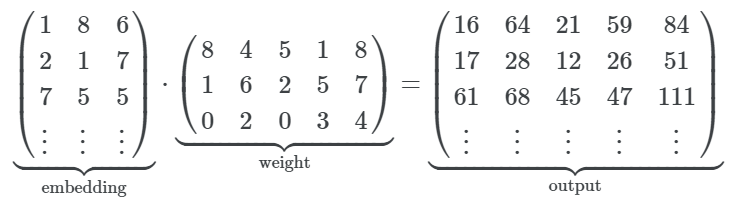

OBS:

    Apesar de terem o nome de "saída", é bom ter cuidado. Particularmente
    eu acho essa nomenclatura perigosa, porque induz o desatento a acreditar
    que o processo acabou ai, e não acabou ainda. Os logits não possuem a
    interpretação da informação que gostariamos. Então passamos essa matriz
    de logits por uma outra função, a nossa função de ativação, no caso aqui,
    a softmax, para transformar esses logists em probabilidades.

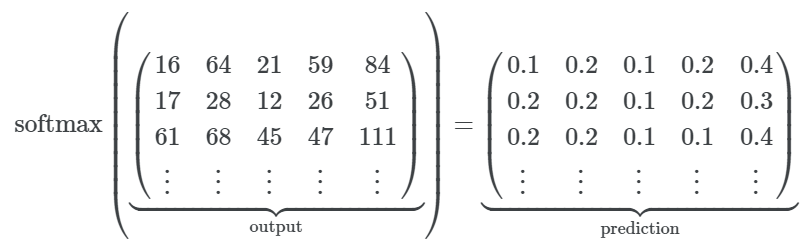

    De modo que agora sim, temos a nossa resposta.

In [ ]:
def softmax(outputs):
  '''
    Função de ativação, utilizada para
  gerar nossa predição, o vetor de
  probabilidade de cada palavra.

  Entrada:
  - Array: Logists

  Saída:
  - list: vetor de probabilidade
  '''
  res = []
  for output in outputs:
      exp = np.exp(output)
      res.append(exp / exp.sum())
  return res

In [ ]:
def forward(model, X, return_cache=True):
  '''
    Função que executa os produtos de matrizes,
  executando todo o processo de aquisição da reposta.

  Entradas:
  - dict: Nosso modelo, um dicionário com os valores
  de cada matriz.
  - array: Nosso vetor
  '''

  # Dicionário para armazenar o modelo:
  cache = {}

  # Execução do modelo:
  cache["a1"] = X @ model["w1"]
  cache["a2"] = cache["a1"] @ model["w2"]
  cache["z"] = softmax(cache["a2"])

  # Para retornar só a predição:
  if not return_cache:
      return cache["z"]
  return cache

**Observando as saídas**

    A título de curiosidade, podemos destacar as operações executadas
    durante o processo de aquisição das respostas, para observar as
    matrízes geradas.

In [ ]:
# Embeddings:
print((X @ model["w1"]),(X @ model["w1"]).shape)

[[-0.8222204   0.24368721  0.24496657 ... -1.40746377 -0.71844422
  -0.21344715]
 [-0.8222204   0.24368721  0.24496657 ... -1.40746377 -0.71844422
  -0.21344715]
 [-0.01224677 -0.89725437  0.07580456 ... -0.32138584  0.41293145
  -0.56372455]
 ...
 [ 0.01841838  1.67643731  0.32692737 ...  0.77086519 -1.47858625
   1.14375404]
 [ 0.79103195 -0.90938745  1.40279431 ... -0.56629773  0.09965137
  -0.50347565]
 [ 0.79103195 -0.90938745  1.40279431 ... -0.56629773  0.09965137
  -0.50347565]] (330, 10)


In [ ]:
# Logits:
print((X @ model["w1"] @ model["w2"]),(X @ model["w1"] @ model["w2"]).shape)

[[-2.0206264  -0.68615136 -0.69766827 ...  2.60612393 -3.33017126
  -1.75176777]
 [-2.0206264  -0.68615136 -0.69766827 ...  2.60612393 -3.33017126
  -1.75176777]
 [-0.36882197  0.15987199 -1.64255508 ...  0.31728163  0.64692337
  -1.72049166]
 ...
 [-1.01264019  2.18993885 -1.22623533 ...  1.50409542 -0.65087168
  -0.23699732]
 [ 1.26404137 -2.94391251 -2.43982069 ...  2.30440642  0.37340106
   0.09093986]
 [ 1.26404137 -2.94391251 -2.43982069 ...  2.30440642  0.37340106
   0.09093986]] (330, 60)


In [ ]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
# Predições:
np.array(sorted(softmax(X @ model["w1"] @ model["w2"])[0],reverse=True))

array([5.05776080e-01, 1.87453667e-01, 8.36063773e-02, 5.36209408e-02,
       3.25423902e-02, 2.05916427e-02, 1.78034483e-02, 1.59596684e-02,
       1.57935877e-02, 7.89327232e-03, 6.25816862e-03, 5.68531317e-03,
       5.19520297e-03, 5.18610074e-03, 4.64682187e-03, 3.97555605e-03,
       3.68305475e-03, 3.37273449e-03, 3.12270794e-03, 2.52191006e-03,
       1.50860067e-03, 1.45263602e-03, 1.43895438e-03, 1.38415263e-03,
       1.31962994e-03, 1.14624664e-03, 1.13547364e-03, 5.87034737e-04,
       5.80312695e-04, 5.74449662e-04, 5.32337369e-04, 4.90270900e-04,
       4.17962953e-04, 3.58306523e-04, 2.70494174e-04, 2.65470804e-04,
       2.02242523e-04, 2.01564497e-04, 1.97174215e-04, 1.93552254e-04,
       1.54564109e-04, 1.51160638e-04, 1.34609205e-04, 1.07670942e-04,
       9.83060314e-05, 8.25021861e-05, 4.98918864e-05, 4.62072778e-05,
       4.17891056e-05, 4.17234825e-05, 3.86386922e-05, 3.06455842e-05,
       2.36742948e-05, 1.77493689e-05, 1.24732765e-05, 6.67661741e-06,
      

# Backpropagation:

    Feito o processo de aquisição da resposta, o feedforward, temos algo para
    comparar com a nossa resposta real que deveria ter ocorrido. Essa resposta
    predita pelo modelo será avaliada e os pesos serão ajustados para esse
    que as respostas sejam mais próximas do valor real, como é em todo processo
    de aprendizado supervisionado.


    O tutorial indica outro post, indicando melhores explicações sobre o
    processo de backpropagation.

Tutorial-Construindo Rede Neural do Zero:

https://jaketae.github.io/study/neural-net/

**Entrepia Cruzada: Nossa Função Objetivo**

    No treinamento—especificamente no cálculo do erro e na
    retropropagação—estaríamos comparando essa previsão de vetores
    de probabilidade com seus verdadeiros alvos codificados one-hot.
    A função de perda que usamos com softmax é a entropia cruzada (Ou
    perda logarítima) definida como:

$H(y,\hat{y}) = -\sum_i y\ log(\hat{y})$


    Como y é um vetor codificado one-hot neste caso, todos os elementos em
    y cuja entrada é zero não terão efeito no resultado final. De fato,
    acabamos apenas pegando o logaritmo negativo da previsão. Observe que
    quanto mais próximo o valor da previsão estiver de 1, menor será a
    entropia cruzada, e vice-versa. Isso está alinhado com o comportamento
    que queremos, já que desejamos que a probabilidade prevista seja o mais
    próxima possível de 1.

In [ ]:
def cross_entropy(z, y):
  '''
    Função que executa a nossa função
  de perda, entropia cruzada baseada
  no calculo de entropia de Shannon.
  '''
  return - np.sum(np.log(z) * y)

In [ ]:
def backward(model, X, y, alpha):
  '''
    Função que executa o processo de treinamento
  do modelo, pelo processo de backpropagation.
  '''
  # Rodando o modelo - Aquisitando as respostas:
  cache  = forward(model, X)

  # Treinando o modelo:
  da2 = cache["z"] - y
  dw2 = cache["a1"].T @ da2
  da1 = da2 @ model["w2"].T
  dw1 = X.T @ da1
  assert(dw2.shape == model["w2"].shape)
  assert(dw1.shape == model["w1"].shape)
  model["w1"] -= alpha * dw1
  model["w2"] -= alpha * dw2
  return cross_entropy(cache["z"], y)

# Testando o modelo:

    Como temos apenas um pequeno número de dados de treinamento - juntamente
    com o fato de que o algoritmo de retropropagação é simples descida
    gradiente em lote - vamos apenas iterar por 50 épocas. Durante o
    treinamento, armazenaremos em cache o valor da função de erro de
    entropia cruzada em uma lista de histórico. Podemos então representar
    graficamente esse resultado para ter uma noção melhor se o treinamento
    funcionou corretamente.

In [ ]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

<ipython-input-33-7d270d17560c>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


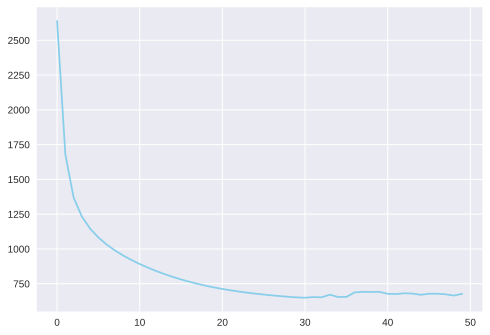

In [ ]:
# Setando estilo:
plt.style.use("seaborn")

# Numero de Interações:
n_iter = 50

# Taxa de aprendizado:
learning_rate = 0.05

# Construindo histórico de aprendizado:
history = [backward(model, X, y, learning_rate) for _ in range(n_iter)]

# Visualização:
plt.plot(range(len(history)), history, color="skyblue")
plt.show()

In [ ]:
learning = one_hot_encode(word_to_id["learning"], len(word_to_id))
result = forward(model, [learning], return_cache=False)[0]

for word in (id_to_word[id] for id in np.argsort(result)[::-1]):
    print(word)

algorithms
are
so
build
machine
the
intelligence
that
learning
a
is
it
in
to
data
develop
used
improve
where
through
perform
automatically
study
do
tasks
experience
or
as
needed
and
known
filtering
order
conventional
make
seen
based
training
programmed
mathematical
artificial
vision
wide
predictions
explicitly
difficult
decisions
such
model
computer
subset
on
sample
infeasible
variety
without
email
being
of
applications


In [ ]:
get_embedding(model, "machine")

array([ 0.63497979, -0.37991285,  0.11434133,  0.8731454 , -0.39279945,
       -1.50767991, -1.38020676,  1.35460479, -0.15972992,  0.67309538])